## Multilabel prediction with decors design patterns dataset



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

### Getting access to my data


In [3]:
path = Config.data_path()/'decors'
path.mkdir(parents = True , exist_ok = True)
path

PosixPath('/home/stan_demontmarin/.fastai/data/decors')

In [4]:
# ! kaggle datasets download -d olgabelitskaya/traditional-decor-patterns -f decor.csv -p {path}
# ! kaggle datasets download -d olgabelitskaya/traditional-decor-patterns -f decor.zip -p {path}
# ! kaggle datasets download -d olgabelitskaya/traditional-decor-patterns -f DecorColorImages.h5 -p {path}

### unpacking the data

Done with the console comand unzip

## Time for some MULTICLASSIFICATION model  bitches !


In [5]:
df = pd.read_csv(path/'decor.csv')
# df['label'] = df[['country', 'decor', 'type']].apply(lambda x: ' '.join(x), axis=1)
# df.to_csv(path/'decor.csv')
df.head()

,Unnamed: 0,country_label,country,decor_label,decor,type_label,type,file,label
0,0,1,Russia,1,Gzhel,1,pattern,01_01_1_001.png,Russia Gzhel pattern
1,1,1,Russia,1,Gzhel,1,pattern,01_01_1_002.png,Russia Gzhel pattern
2,2,1,Russia,1,Gzhel,1,pattern,01_01_1_003.png,Russia Gzhel pattern
3,3,1,Russia,1,Gzhel,1,pattern,01_01_1_004.png,Russia Gzhel pattern
4,4,1,Russia,1,Gzhel,1,pattern,01_01_1_005.png,Russia Gzhel pattern


In [6]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.02)

In [7]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'decor.csv', cols='file')
       .split_by_rand_pct(0.2)
       .label_from_df(cols='label', label_delim=' '))

In [8]:
data = (src.transform(tfms, size=150)
        .databunch().normalize(imagenet_stats)
       )

In [9]:
# data.show_batch(rows=3, figsize=(12,9))

In [10]:
arch = models.resnet50

In [11]:
acc_02 = partial(accuracy_thresh, thresh = 0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [12]:
data.c

15

In [13]:
data.classes

['Belarus',
 'Gorodets',
 'Gzhel',
 'Iznik',
 'Khokhloma',
 'Neglyubka',
 'Poland',
 'Russia',
 'Turkey',
 'Wycinanki',
 'Wzory',
 'kaszubskie',
 'pattern',
 'product',
 'łowickie']

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


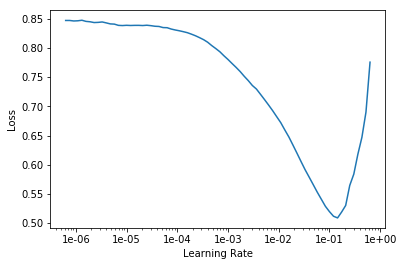

In [15]:
learn.recorder.plot()

In [16]:
lr = 1e-02

In [17]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.710920,0.599771,0.363574,0.618406,00:02
1,0.567668,0.363650,0.600000,0.718339,00:02
2,0.441743,0.153145,0.883162,0.896758,00:01
3,0.341206,0.105348,0.947079,0.926896,00:01
4,0.276419,0.103000,0.949828,0.927594,00:01


In [18]:
learn.save('stage-1-rn50')

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


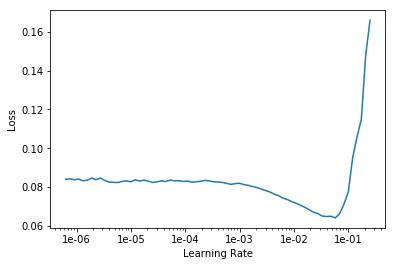

In [20]:
learn.recorder.plot()

In [21]:
learn.save('stage-1-rn50')

### fine tuning the whole model

In [22]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(5, slice(1e-03, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.077659,0.092958,0.949828,0.934929,00:02
1,0.075333,1.263820,0.865979,0.793045,00:02
2,0.077062,0.302854,0.936770,0.883739,00:02
3,0.076447,0.238859,0.957388,0.907952,00:02
4,0.067701,0.109490,0.968385,0.937323,00:02


In [27]:
learn.save('stage-2-rn50')

In [29]:
learn.load('stage-2-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (388 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: MultiCategoryList
Russia;Gzhel;pattern,Russia;Gzhel;pattern,Russia;Gzhel;pattern,Russia;Gzhel;pattern,Russia;Gzhel;pattern
Path: /home/stan_demontmarin/.fastai/data/decors;

Valid: LabelList (97 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: MultiCategoryList
Turkey;Iznik;product,Belarus;Neglyubka;product,Russia;Khokhloma;product,Belarus;Neglyubka;pattern,Turkey;Iznik;product
Path: /home/stan_demontmarin/.fastai/data/decors;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_

In [30]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


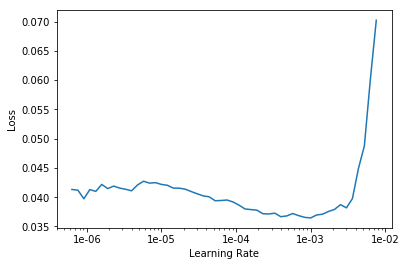

In [31]:
learn.recorder.plot()